In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [60]:
df= pd.read_csv('forest_fires_dataset.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [62]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [63]:
df.mean()

X         4.669246
Y         4.299807
FFMC     90.644681
DMC     110.872340
DC      547.940039
ISI       9.021663
temp     18.889168
RH       44.288201
wind      4.017602
rain      0.021663
area     12.847292
dtype: float64

In [64]:
df.max()

X              9
Y              9
month        sep
day          wed
FFMC        96.2
DMC        291.3
DC         860.6
ISI         56.1
temp        33.3
RH         100.0
wind         9.4
rain         6.4
area     1090.84
dtype: object

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


<AxesSubplot:>

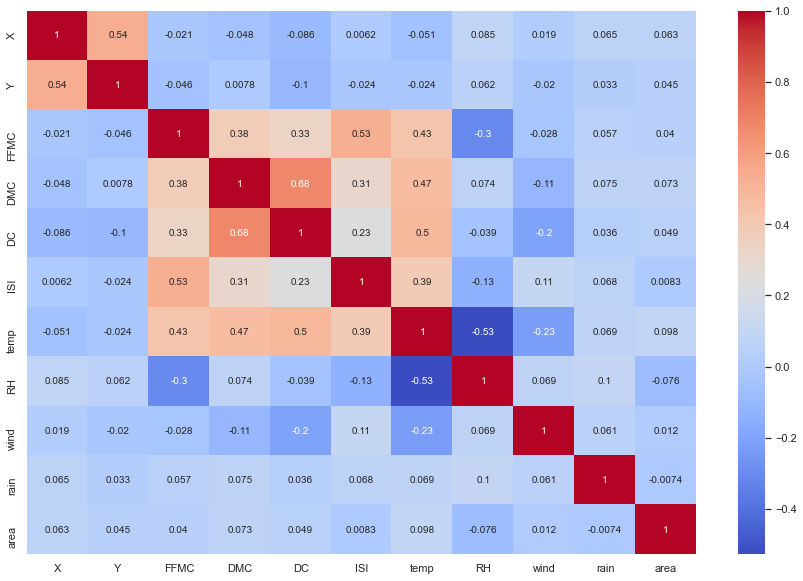

In [66]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

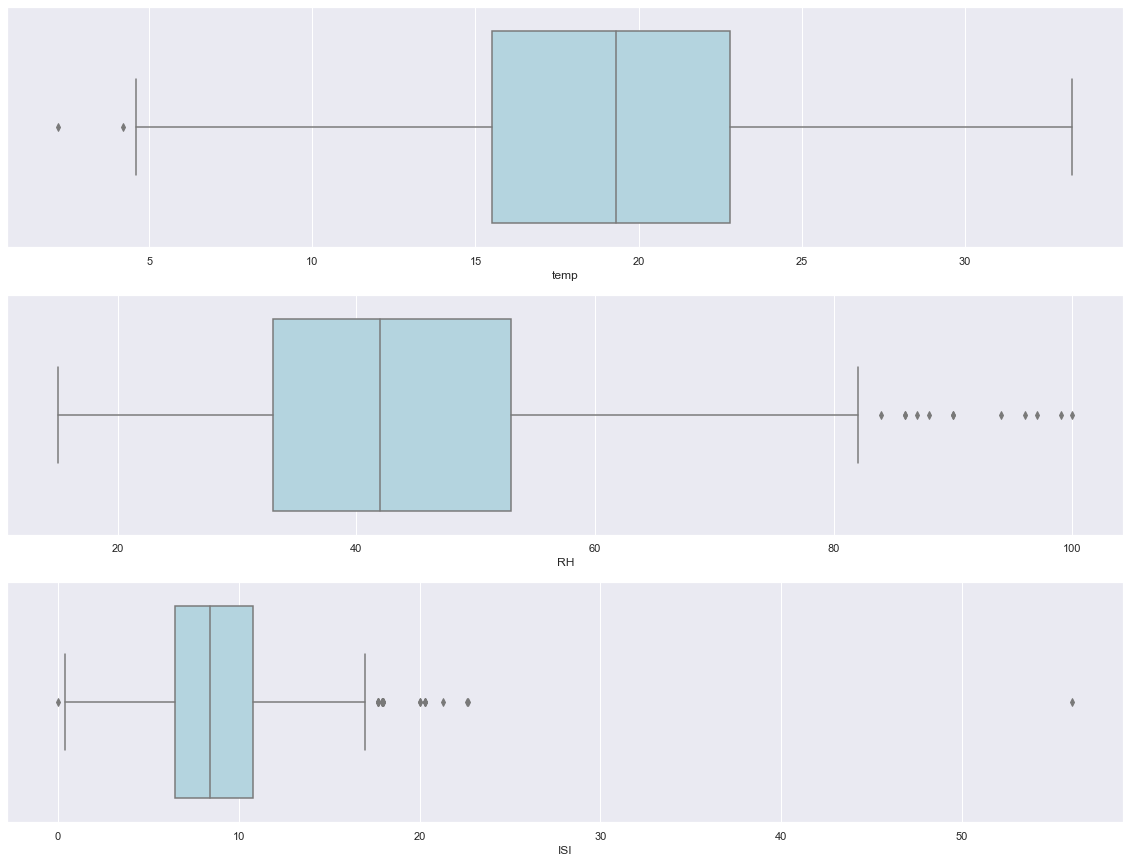

In [67]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.temp, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.RH, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df.ISI, color='lightblue')

plt.show()

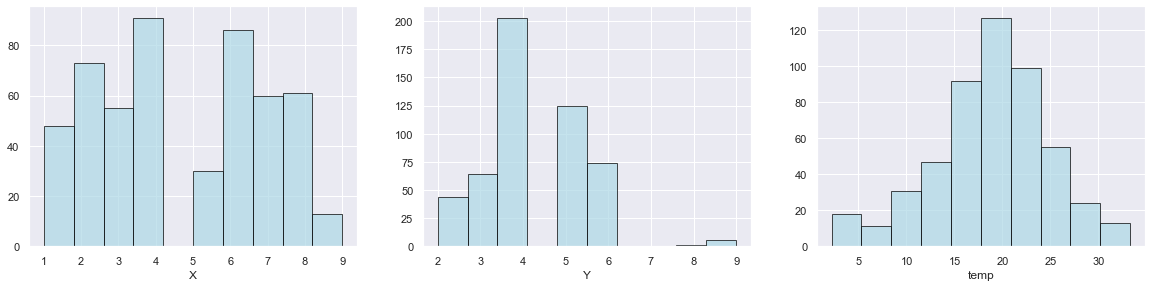

In [68]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.X, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('X')

plt.subplot(3,3,2)
plt.hist(df.Y, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Y')

plt.subplot(3,3,3)
plt.hist(df.temp, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('temp')

plt.show()

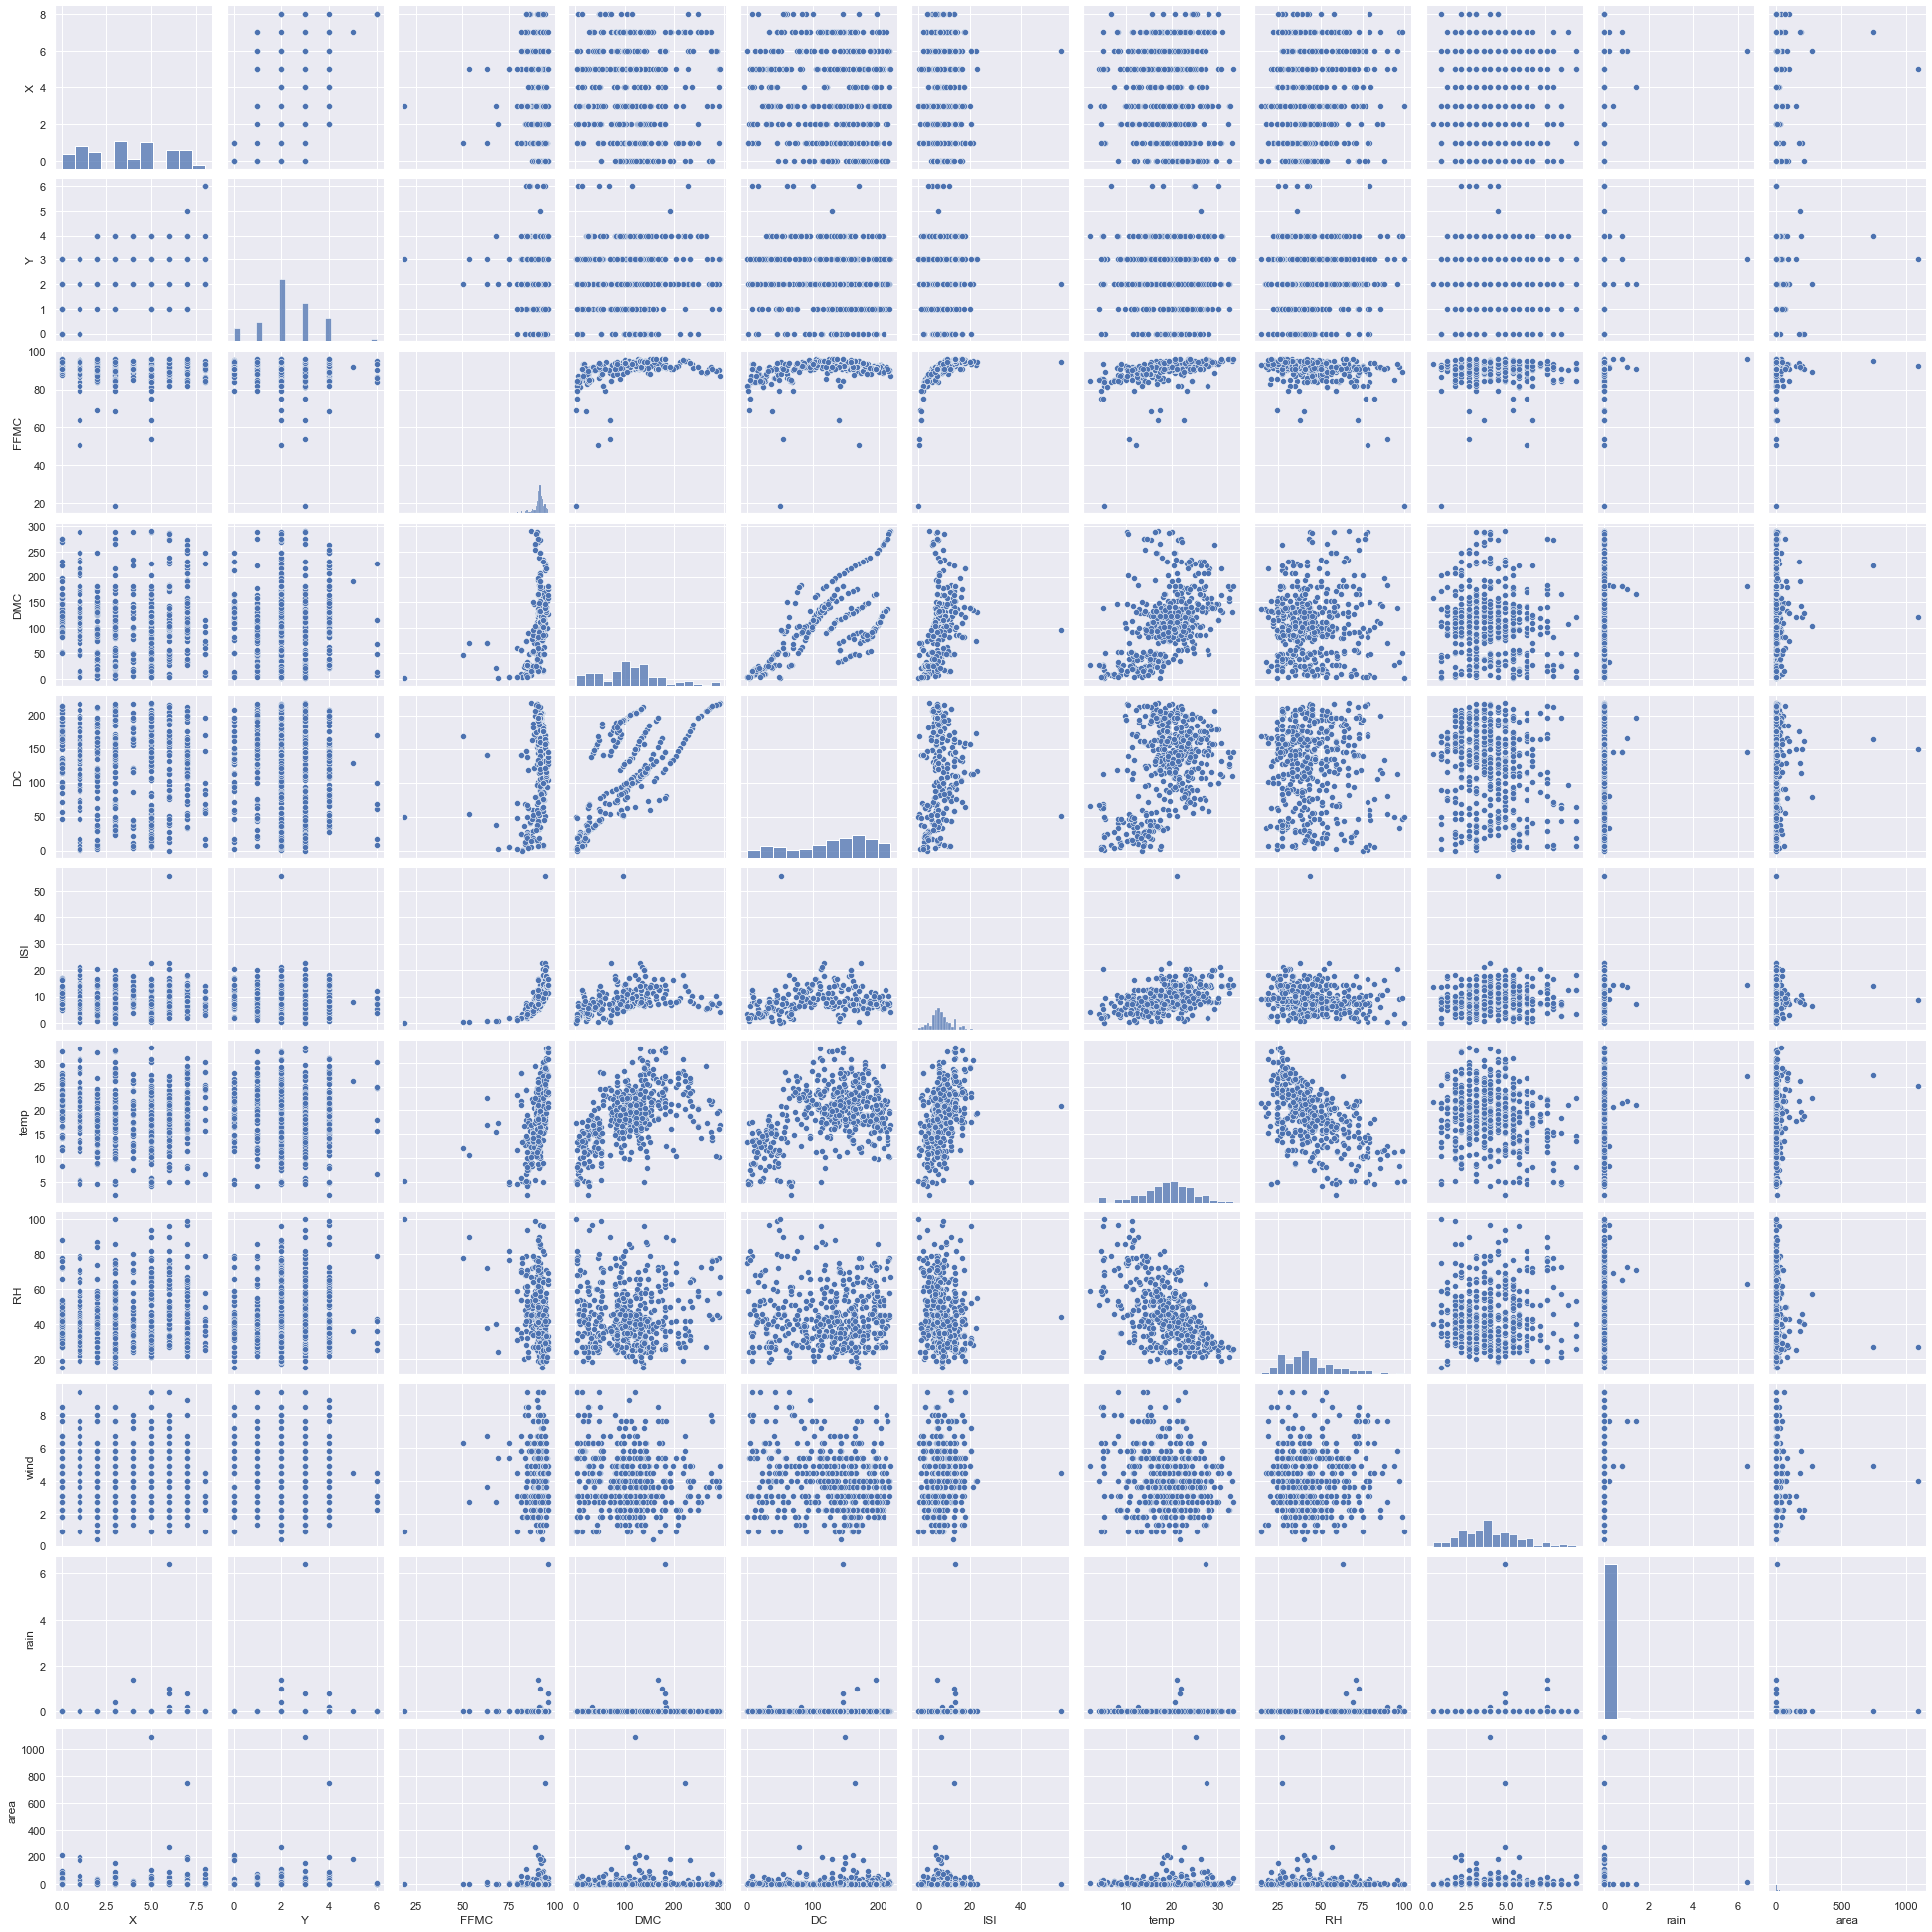

In [69]:
df_e = copy.deepcopy(df)
df_e.loc[:,['X', 'Y', 'DC']] = df_e.loc[:,['X', 'Y', 'DC']].apply(LabelEncoder().fit_transform)
sns.pairplot(df_e)  #pairplot
plt.show()

<AxesSubplot:>

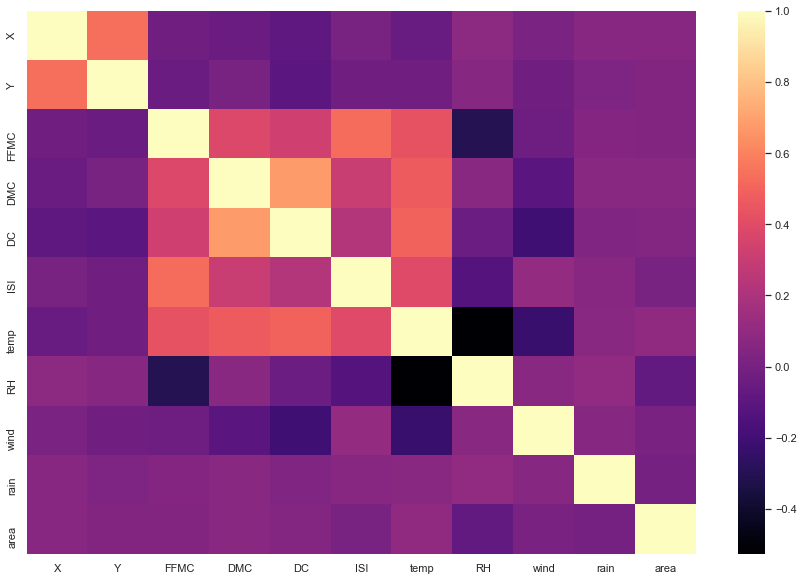

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='magma')

In [87]:
df.std()

X         2.313778
Y         1.229900
FFMC      5.520111
DMC      64.046482
DC      248.066192
ISI       4.559477
temp      5.806625
RH       16.317469
wind      1.791653
rain      0.295959
area     63.655818
dtype: float64

In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
X=df.iloc[:, :2]

#scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#label encoder
y=df.iloc[:,3]
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([0, 5, 2, 0, 3, 3, 1, 1, 5, 2, 2, 2, 0, 1, 6, 0, 2, 1, 6, 2, 5, 1,
       3, 2, 2, 3, 0, 1, 2, 3, 0, 1, 0, 3, 1, 5, 5, 0, 2, 5, 5, 2, 5, 2,
       6, 6, 1, 1, 1, 1, 4, 3, 6, 6, 4, 4, 5, 3, 1, 0, 3, 3, 4, 3, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 1, 0, 5, 3, 3, 5, 6, 4, 4, 4, 4,
       3, 2, 2, 0, 3, 3, 1, 3, 2, 2, 3, 3, 3, 5, 5, 2, 2, 0, 4, 3, 2, 1,
       0, 0, 3, 1, 5, 5, 2, 2, 1, 4, 1, 1, 3, 5, 0, 3, 1, 0, 6, 3, 2, 1,
       3, 4, 5, 2, 3, 1, 5, 5, 1, 6, 0, 2, 6, 4, 1, 5, 5, 4, 0, 3, 2, 0,
       2, 3, 2, 6, 6, 0, 1, 4, 2, 2, 3, 4, 6, 6, 0, 4, 6, 6, 3, 1, 2, 2,
       4, 3, 6, 5, 3, 1, 3, 1, 0, 5, 3, 1, 2, 3, 0, 4, 5, 6, 5, 0, 4, 4,
       5, 1, 5, 3, 3, 6, 2, 4, 2, 5, 0, 4, 2, 2, 0, 1, 2, 2, 3, 1, 6, 1,
       3, 0, 1, 0, 6, 3, 1, 2, 3, 2, 6, 3, 5, 5, 2, 3, 2, 5, 2, 3, 6, 0,
       3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 4, 4, 4, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 3, 6, 4, 1, 1, 1, 1, 0, 5, 3, 6, 0, 3,
       6, 2, 2, 2, 2, 2, 0, 5, 5, 3, 3, 3, 6, 2, 1,

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [126]:
model= []
accuracy = []

In [132]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=101)
rand_forest.fit(X_train,y_train)

#Confusion Matrix
y_pred = rand_forest.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

print("accuracy of RF': {}".format(accuracy_score(y_pred,y_test)))
model.append("RF")
accuracy.append(accuracy_score(y_pred,y_test)) 
print(conf_mat)


accuracy of RF': 0.09615384615384616
[[2 2 1 4 1 2 0]
 [3 1 3 4 0 1 0]
 [4 3 1 7 0 1 0]
 [6 3 2 4 2 0 0]
 [2 4 0 6 1 2 0]
 [3 4 4 4 3 1 0]
 [2 4 0 2 2 3 0]]
